In [2]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import re
import time
url = 'https://ufrn.br/imprensa/noticias/filtros?text=eaj'
driver = webdriver.FirefoxOptions()
driver.headless = True
driver = webdriver.Firefox()
links=[]
title=[]
resultsDataNotices =[]
driver.get(url)
for i in range(14):
    
    soup = BeautifulSoup(driver.page_source,'html.parser')
    #procura por todos os links
    listLinks = soup.findAll("a",class_='blue-link')
    #procura por todos os titulos
    
    dataNotices = soup.findAll("div",class_="block-title")
    
    #laço para verificar o número de resultados obtidos na pesquisa
    for l in range(len(links)):
        #print(links[l])
        numberResults = soup.find("h1",{"id":'qtd-resultados'}).text.strip('resultados em Notícias')
    #print(numberResults)
    
    #laço para pegar os titulos 
    for i in range(len(listLinks)):
        title.append(listLinks[i].get_text())
        print(listLinks[i].get_text())  
    
    #laço para percorrer e pegar os links , pesquisando por todos os href que contêm imprensa/
    for link in soup.findAll('a',class_="blue-link" ,attrs={'href':re.compile("^imprensa/")}):
        links.append(link['href'])
    #laço para pegar todas as datas das publicações
    for i in range(len(dataNotices)):
        resultsDataNotices.append(dataNotices[i].get_text().strip('\n'))
        #print(resultsDataNotices)
    #linha de comando para percorrer todas as páginas
    driver.find_element_by_xpath("//a[contains(text(),'>')]").click()
    time.sleep(3)


    



EAJ abre inscrições para projeto do Programa de Residência Profissional Agrícola
UFRN reajusta auxílio alimentação de estudantes do interior
EAJ abre seleção de bolsistas para Programa de Residência Profissional Agrícola
EAJ abre inscrições para processo seletivo de cursos técnicos
EAJ divulga edital de processo seletivo para cursos técnicos
EAJ-UFRN realiza colação de grau dos cursos de graduação
EAJ realiza processo seletivo de mestrado em Ciências Florestais
Projeto da EAJ mostra potencial produtivo da carcinicultura
Estudantes da EAJ se classificam para nova fase da OBR
EAJ é premiada em Congresso Internacional


EAJ realiza Mostra Virtual de Profissões
EAJ abre oportunidade para incubação de empresas
EAJ realiza Audiência Pública para discussão do Plano Diretor da Unidade
Projeto da EAJ sobre bem-estar animal capacita professores do ensino básico
EAJ promove I Workshop de Arborização
EAJ-UFRN realiza o II Simpósio Potiguar em Ciências Florestais
EAJ classifica estudantes para a 

In [4]:
len(links)

137

In [3]:
text = []
for i in range(len(links)):
    url = f'https://ufrn.br/{links[i]}'
    driver = webdriver.Firefox()
    driver.get(url)
    content = driver.find_elements_by_css_selector("span[style='font-weight: 400;']")
    for i in range(len(content)):
         text.append(content[i].text)
    driver.close()

In [7]:
# salvando em um csv para melhor visualizar os textos
import pandas as pd
text
df = pd.DataFrame(text)
df.to_csv("texts.csv",index=False,sep=";")


In [124]:
print(len(title))

118


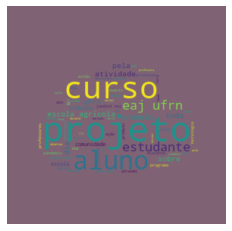

In [54]:
#criando nuvem de palavras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
STOPWORDS = ['ver','principal','essa','vez','nas','mas',
             'qual','principal','ele','ter','doença','pois','este',
             'vez','ver principal','artigo principal','já',
             'aos','pode','outro','artigo','desse',
             'alguns','meio','entre','das','podem','esse',
             'seu','também','são','quando','de', 'que','em',
             'para','na','ao','mais','por','não','ainda','muito','sua',
             'a', 'é', 'o','e','um','dos', 'no','os','nos','do','as','se','como','foi','uma','das','oi','com','da']
def create_word_cloud(string):
   maskArray = np.array(Image.open("cloud.jpg"))
   cloud = WordCloud(background_color = "#7f6374", max_font_size=50, max_words = 700, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file("wordCloud.png")
   plt.figure()
   plt.imshow(cloud, interpolation='bilinear')
   plt.axis('off')

create_word_cloud(''.join(texto).lower())

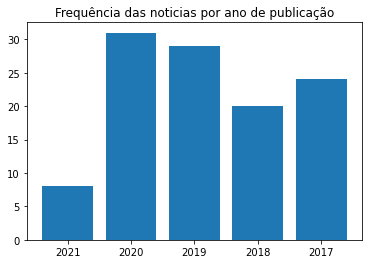

In [43]:
import collections
#gerando gráfico de acordo com o ano das publicações
data = []
for i in range(len(resultsDataNotices)):
    frequency = resultsDataNotices[i]
    data.append(frequency[-4::])

counter=collections.Counter(data)
data = counter.keys()
frequency = counter.values()

plt.title("Frequência das noticias por ano de publicação") 
plt.bar(data, frequency)
plt.show()